### Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import joblib
import os
import cv2
import warnings

### Prepare/collect data

In [2]:


path = os.listdir('datasets/')
classes = {'no':0, 'yes':1, 'Unrelated_images':2}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'datasets/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1, 2])

In [6]:
pd.Series(Y).value_counts()

0    1586
1    1501
2     803
Name: count, dtype: int64

In [7]:
X.shape, X_updated.shape

((3890, 200, 200), (3890, 40000))

### Visualize data

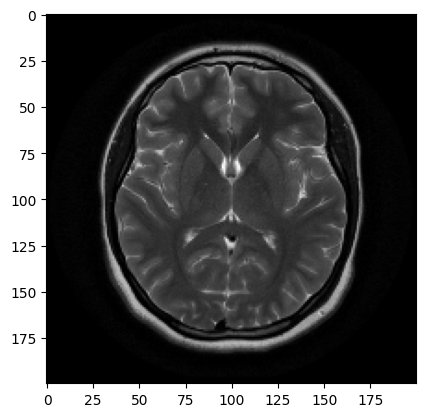

In [8]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3890, 40000)

### Split Data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((3112, 40000), (778, 40000))

### Feature Scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(3112, 40000) (778, 40000)


In [15]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:

warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [18]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [19]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [20]:
#Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [21]:
warnings.filterwarnings('ignore')
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [22]:
#Decision Tree Regressor
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=2)

In [23]:
#Multi-Layer Perceptron Classifier
mlp_model = MLPClassifier()
mlp_model.fit(xtrain, ytrain) 

MLPClassifier()

### Evaluation

In [24]:
print("Training Score:", lg.score(xtrain, ytrain))#Here we are calculating Accuracy Score so both labels and the corresponding data is used to calculate accuracy score but depending on the type of scores that we are calculating we have to pass the paramaters.(Ex: sometimes we pass predicted and test values for r2 score and so on).
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.961439588688946


In [25]:
print("Training Score:", rf_classifier.score(xtrain, ytrain))
print("Testing Score:", rf_classifier.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9601542416452442


In [26]:
print("Training Score:", dt_classifier.score(xtrain, ytrain))
print("Testing Score:", dt_classifier.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8611825192802056


In [27]:
print("Training Score:", regr.score(xtrain, ytrain))
print("Testing Score:", regr.score(xtest, ytest))
#least value

Training Score: 0.5558716066170537
Testing Score: 0.536679465439174


In [28]:
print("Training Score:", knn.score(xtrain, ytrain))
print("Testing Score:", knn.score(xtest, ytest))

Training Score: 0.9434447300771208
Testing Score: 0.8894601542416453


In [29]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9865038560411311
Testing Score: 0.9717223650385605


In [30]:
print("Training Score:", mlp_model.score(xtrain, ytrain))
print("Testing Score:", mlp_model.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9704370179948586


In [31]:
model1 = RandomForestClassifier(random_state=42)
model2 = KNeighborsClassifier(n_neighbors=1)
model3 = DecisionTreeClassifier(random_state=0)
ensemble1 = VotingClassifier(
    estimators=[('model1', model1), ('model2', model2), ('model3', model3)],
    voting='hard'  # Use 'soft' for weighted voting based on probabilities
)
ensemble1.fit(xtrain, ytrain)
accuracy1 = ensemble1.score(xtrain,ytrain)
accuracy2 = ensemble1.score(xtest,ytest)
y_pred = ensemble1.predict(xtest)
print("Train Accuracy ",accuracy1)
print("Test Accuracy ",accuracy2)

Train Accuracy  1.0
Test Accuracy  0.9704370179948586


In [32]:
joblib.dump(sv, 'svm_model.joblib')#This loads the model from this file to svm_model.joblib and data.joblib 
joblib.dump((xtrain, ytrain, xtest, ytest), 'data.joblib')

['data.joblib']

In [33]:
joblib.dump(ensemble1, 'ensemble1.joblib')#This loads the model from this file to svm_model.joblib and data.joblib 


['ensemble1.joblib']

In [34]:
joblib.dump(mlp_model, 'mlp_model.joblib')#This loads the model from this file to svm_model.joblib and data.joblib 

['mlp_model.joblib']

In [35]:
joblib.dump(knn, 'knn_model.joblib')#This loads the model from this file to svm_model.joblib and data.joblib 

['knn_model.joblib']

In [36]:
joblib.dump(regr, 'regr_model.joblib')#This loads the model from this file to svm_model.joblib and data.joblib 

['regr_model.joblib']

In [37]:
joblib.dump(dt_classifier, 'dt_classifier_model.joblib')#This loads the model from this file to svm_model.joblib and data.joblib 

['dt_classifier_model.joblib']

In [38]:
joblib.dump(rf_classifier, 'rf_classifier_model.joblib')#This loads the model from this file to svm_model.joblib and data.joblib 

['rf_classifier_model.joblib']

In [39]:
joblib.dump(lg, 'lg_model.joblib')#This loads the model from this file to svm_model.joblib and data.joblib 

['lg_model.joblib']

### Prediction

In [40]:
pred = sv.predict(xtest)


In [41]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 97, 187, 205, 231, 263, 304, 327, 345, 352, 358, 384, 464, 469,
        504, 519, 553, 582, 686, 691, 692, 716, 771], dtype=int64),)

In [42]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  22
1 1


### TEST MODEL

In [43]:
dec = {0:'No Tumor', 1:'Positive Tumor', 2:'Unrelated Images'}

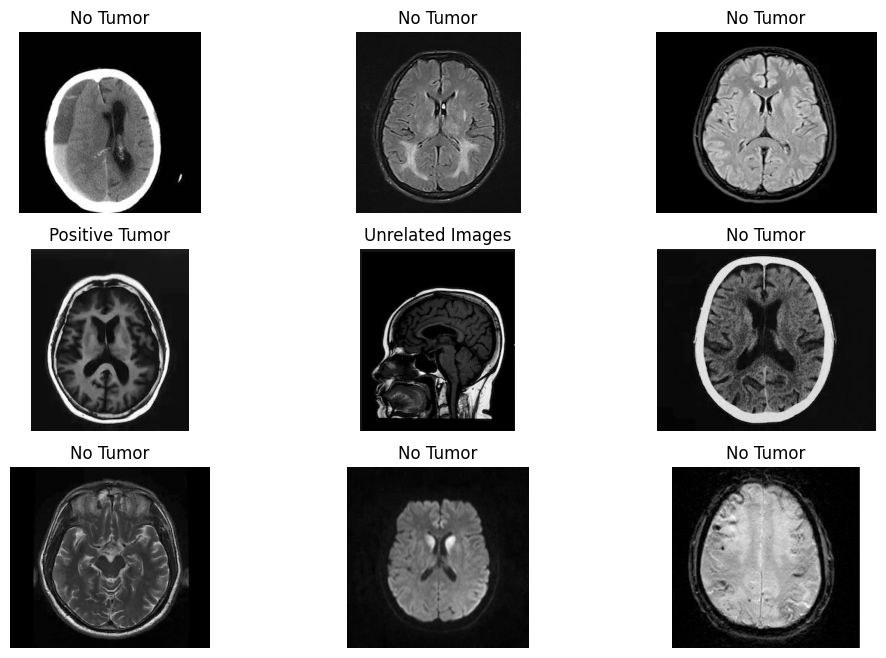

In [44]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

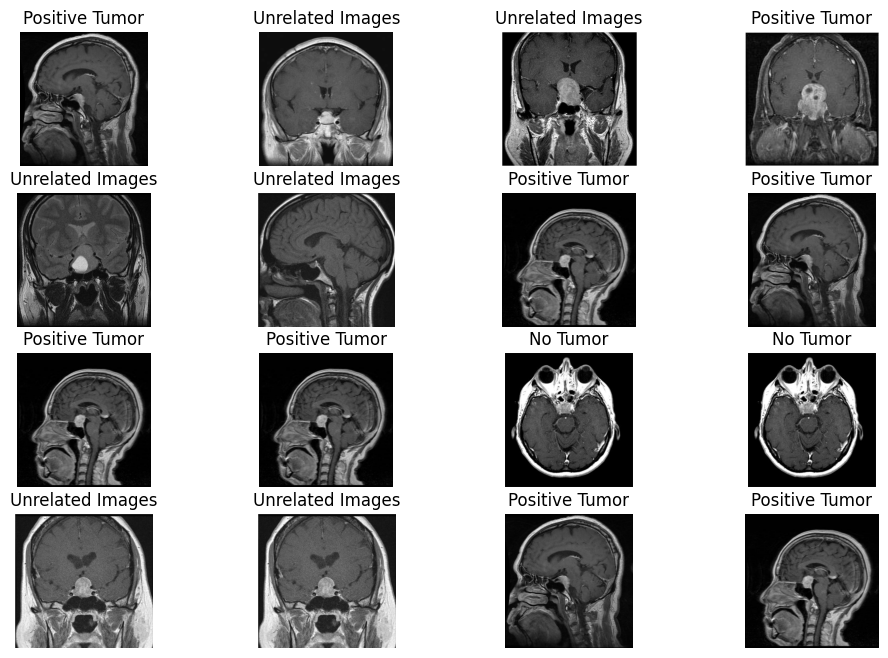

In [45]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [46]:
#plot
import numpy as np
import matplotlib.pyplot as plt

# Function to get accuracies
def get_accuracies():
    accuracies = {
        "Ensemble1": {
            "train": ensemble1.score(xtrain, ytrain),
            "test": ensemble1.score(xtest, ytest)
        },
        "KNN": {
            "train": knn.score(xtrain, ytrain),
            "test": knn.score(xtest, ytest)
        },
        "Random Forest": {
            "train": rf_classifier.score(xtrain, ytrain),
            "test": rf_classifier.score(xtest, ytest)
        },
        "Decision Tree": {
            "train": dt_classifier.score(xtrain, ytrain),
            "test": dt_classifier.score(xtest, ytest)
        },
        "Logistic Regression": {
            "train": lg.score(xtrain, ytrain),
            "test": lg.score(xtest, ytest)
        },
        "MLP": {
            "train": mlp_model.score(xtrain, ytrain),
            "test": mlp_model.score(xtest, ytest)
        },
        "SVM": {
            "train": sv.score(xtrain, ytrain),
            "test": sv.score(xtest, ytest)
        },
        "Decision Tree Regressor": {
            "train": regr.score(xtrain, ytrain),
            "test": regr.score(xtest, ytest)
        }
    }
    return accuracies

# Assuming the models and datasets are already defined
# ensemble1, knn, rf_classifier, dt_classifier, lg, mlp, sv, regr
# xtrain, ytrain, xtest, ytest

if __name__ == "__main__":
    accuracies = get_accuracies()
    
    # Define colors for training and testing scores
    colors_train = ['skyblue'] * len(accuracies)
    colors_test = ['lightgreen'] * len(accuracies)
    
    # Prepare data for plotting
    model_names = list(accuracies.keys())
    train_scores = [accuracies[model]["train"] for model in model_names]
    test_scores = [accuracies[model]["test"] for model in model_names]
    
    # Set up bar width and positions
    bar_width = 0.35
    indices = np.arange(len(model_names))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot training and testing scores side by side
    bars1 = ax.barh(indices - bar_width/2, train_scores, bar_width, label='Training Score', color=colors_train)
    bars2 = ax.barh(indices + bar_width/2, test_scores, bar_width, label='Testing Score', color=colors_test)
    
    # Add labels, title, and legend
    ax.set_xlabel('Accuracy')
    ax.set_title('Model Accuracy Comparison (Training vs Testing)')
    ax.set_yticks(indices)
    ax.set_yticklabels(model_names)
    ax.legend()
    
    # Add score labels to bars
    for bar in bars1 + bars2:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}', 
                    xy=(width, bar.get_y() + bar.get_height() / 2), 
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='center', va='center')
    
    # Display the plot
    plt.show()
